## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [116]:
import pandas as pd
import numpy as np

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [117]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Color','Origin','Item Size','Variety','City Name','Package']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

In [118]:
import seaborn as sns

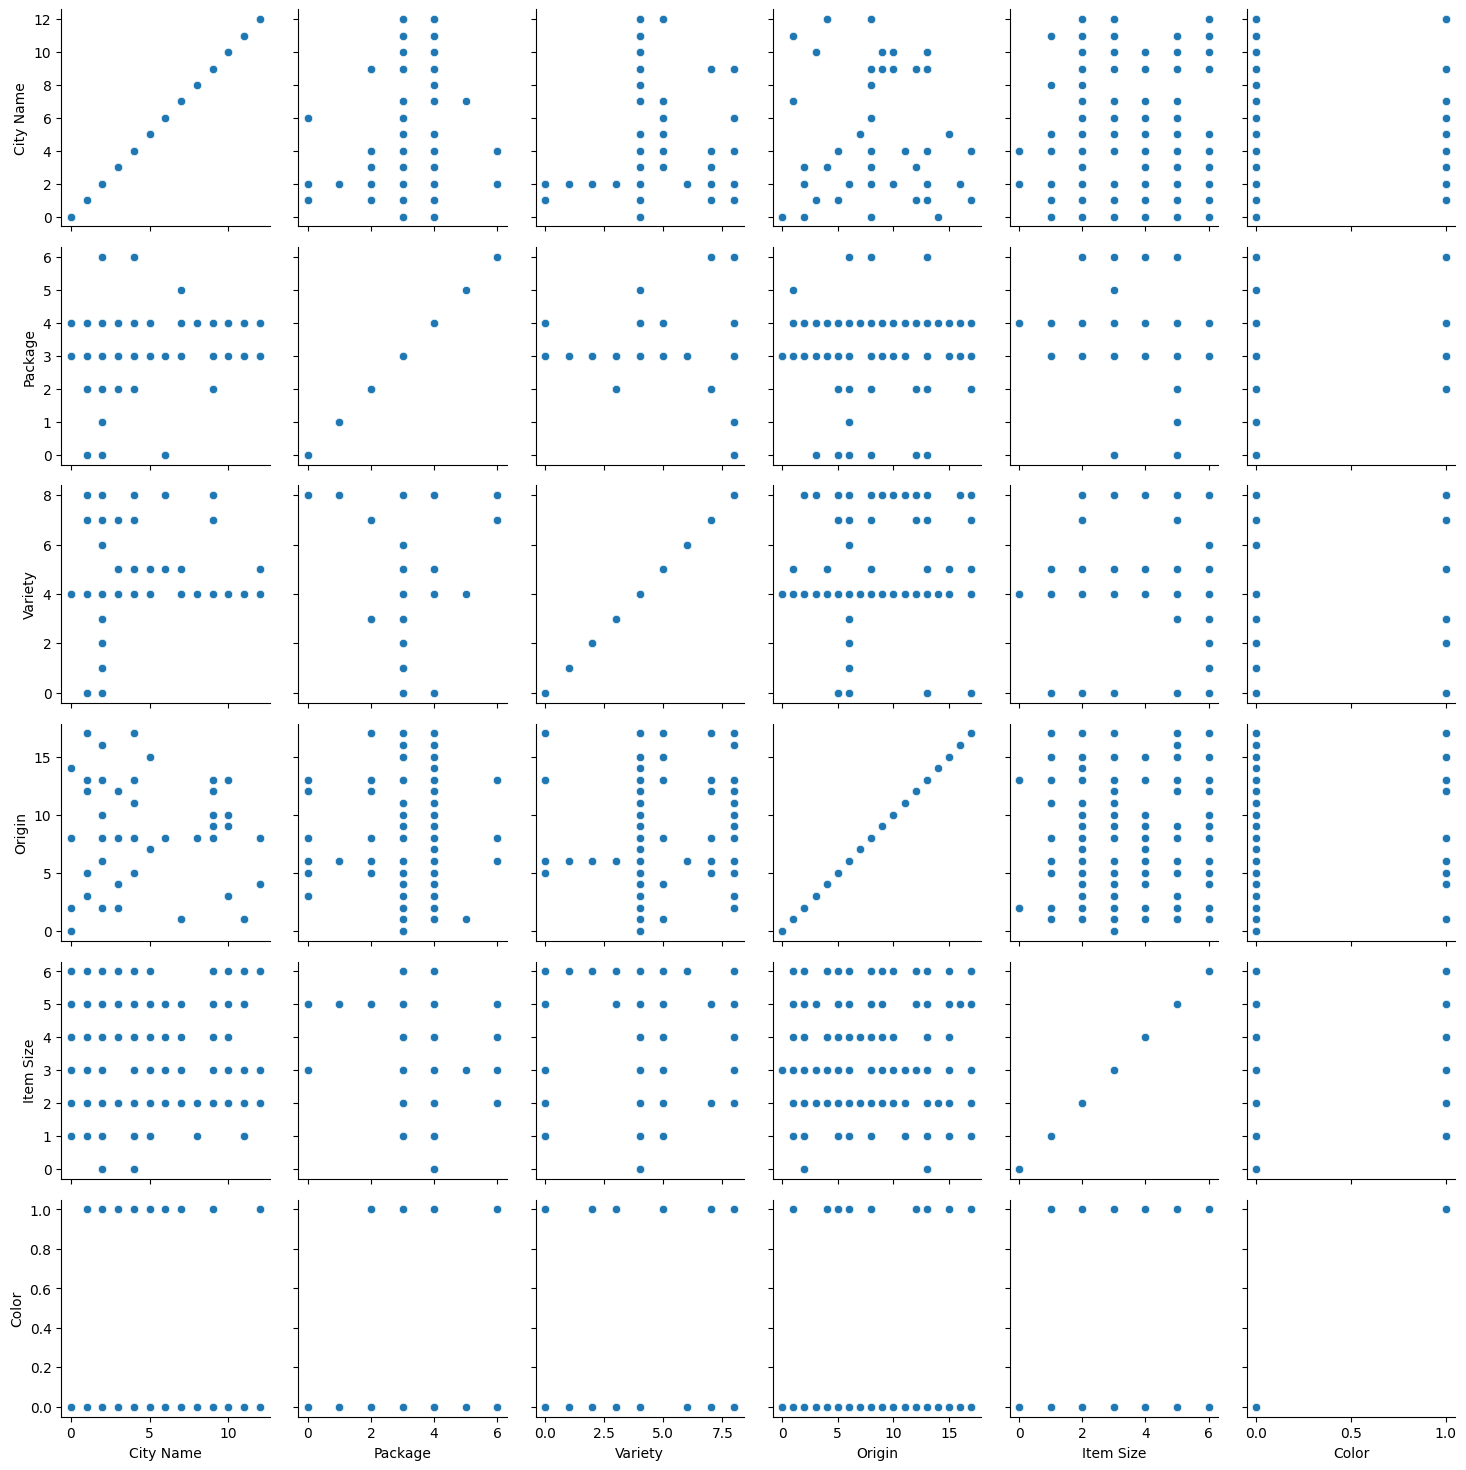

In [119]:
g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)

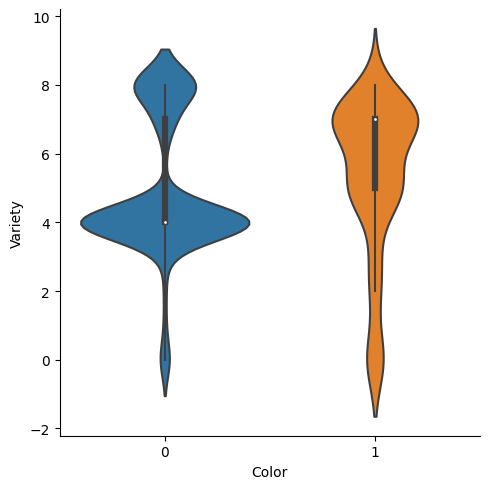

In [120]:
sns.catplot(data=new_pumpkins, x="Color", y="Variety", kind="violin")

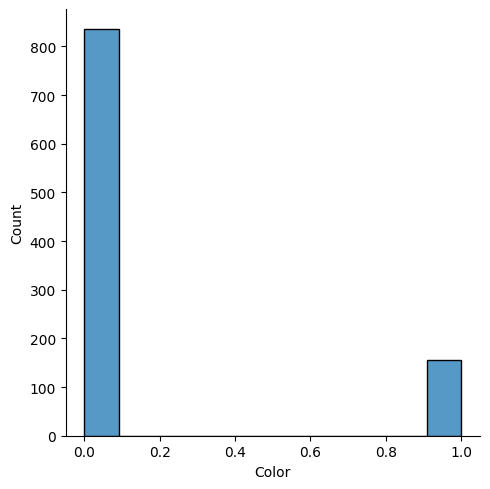

In [121]:
sns.displot(data=new_pumpkins, x="Color", kind="hist")

In [122]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(new_pumpkins, test_size=0.2)

In [123]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792 entries, 540 to 12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   City Name  792 non-null    int64
 1   Package    792 non-null    int64
 2   Variety    792 non-null    int64
 3   Origin     792 non-null    int64
 4   Item Size  792 non-null    int64
 5   Color      792 non-null    int64
dtypes: int64(6)
memory usage: 43.3 KB


In [124]:
# train with variety
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
selected_features = ["Variety"]
label = ["Color"]
p = make_pipeline(LogisticRegression())
X_train = train[selected_features]
y_train = train[label]
X_test = test[selected_features]
y_test = test[label]
p.fit(X_train, y_train)
y_pred = p.predict(X_test) 


/home/jiheng/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       169
           1       0.00      0.00      0.00        30

    accuracy                           0.85       199
   macro avg       0.42      0.50      0.46       199
weighted avg       0.72      0.85      0.78       199



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[169,   0],
       [ 30,   0]])

auc: 0.47761341222879683


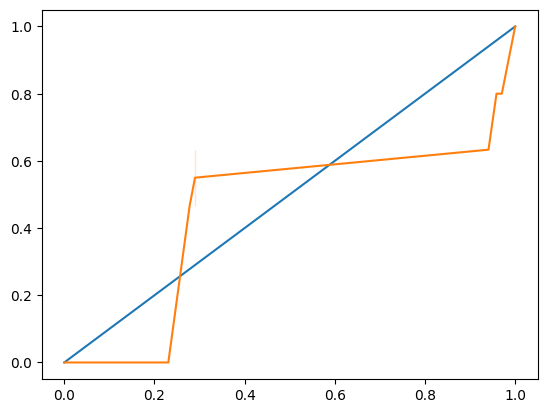

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score
y_proba = p.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)
print(f"auc: {roc_auc_score(y_test, y_proba[:,1])}")

In [128]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
selected_features = ["Variety", "Origin", "Item Size", "Package", "City Name"]
label = ["Color"]
p = make_pipeline(LogisticRegression())
X_train = train[selected_features]
y_train = train[label]
X_test = test[selected_features]
y_test = test[label]
p.fit(X_train, y_train)
y_pred = p.predict(X_test) 

/home/jiheng/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       169
           1       0.00      0.00      0.00        30

    accuracy                           0.85       199
   macro avg       0.42      0.50      0.46       199
weighted avg       0.72      0.85      0.78       199



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


auc: 0.7529585798816568


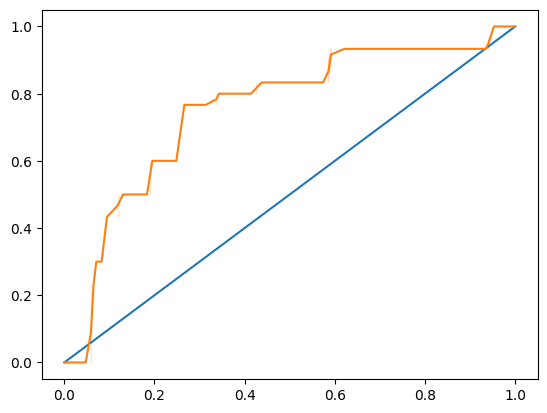

In [130]:
y_proba = p.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])
sns.lineplot(x=[0, 1], y=[0, 1])
sns.lineplot(x=fpr, y=tpr)
print(f"auc: {roc_auc_score(y_test, y_proba[:,1])}")

## Use More Features

In [131]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [132]:
# drop null columns
null_columns = ["Grade", "Environment", "Quality", "Condition", "Appearance", "Unnamed: 24", "Storage", "Crop", "Trans Mode"]
pumpkins.drop(null_columns, axis=1, inplace=True)
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Date             1757 non-null   object 
 6   Low Price        1757 non-null   float64
 7   High Price       1757 non-null   float64
 8   Mostly Low       1654 non-null   float64
 9   Mostly High      1654 non-null   float64
 10  Origin           1754 non-null   object 
 11  Origin District  131 non-null    object 
 12  Item Size        1478 non-null   object 
 13  Color            1141 non-null   object 
 14  Unit of Sale     162 non-null    object 
 15  Repack           1757 non-null   object 
 16  Unnamed: 25      103 non-null    object 
dtypes: float64(4),

In [134]:
# drop na color
pumpkins = pumpkins[pumpkins.Color.isnull() == False]
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141 entries, 2 to 1752
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1141 non-null   object 
 1   Type             1 non-null      object 
 2   Package          1141 non-null   object 
 3   Variety          1141 non-null   object 
 4   Sub Variety      232 non-null    object 
 5   Date             1141 non-null   object 
 6   Low Price        1141 non-null   float64
 7   High Price       1141 non-null   float64
 8   Mostly Low       1052 non-null   float64
 9   Mostly High      1052 non-null   float64
 10  Origin           1141 non-null   object 
 11  Origin District  106 non-null    object 
 12  Item Size        991 non-null    object 
 13  Color            1141 non-null   object 
 14  Unit of Sale     124 non-null    object 
 15  Repack           1141 non-null   object 
 16  Unnamed: 25      89 non-null     object 
dtypes: float64(4),

In [137]:
## drop type
pumpkins.drop(["Type"], axis=1,inplace=True)

In [248]:
# get categorical features
pumpkins.describe(include="object")
categorical_features = ["Package", "Variety", "Sub Variety",  "Item Size", "Unit of Sale", "Repack", "Unnamed: 25"]

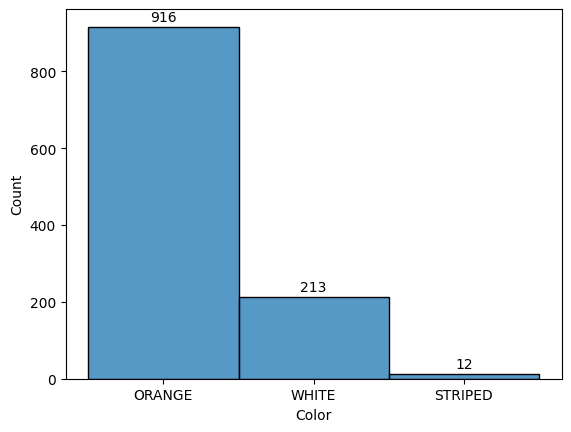

In [249]:
import matplotlib.pyplot as plt
ax = sns.histplot(data=pumpkins["Color"], stat="count")
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f"{height}", xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0,2), ha="center", va="bottom", textcoords="offset points")

In [250]:
# Process Date, let's use just month
pumpkins["Month"] = pd.DatetimeIndex(pumpkins["Date"]).month

In [251]:
pumpkins.describe()

,Low Price,High Price,Mostly Low,Mostly High,Month
count,1141.000000,1141.000000,1052.000000,1052.000000,1141.000000
mean,122.737292,133.478834,128.730513,133.181654,9.738826
std,76.952555,84.593673,80.853207,82.194089,0.647648
min,0.500000,0.500000,0.500000,0.500000,9.000000
25%,30.000000,30.000000,30.000000,35.000000,9.000000
50%,140.000000,150.000000,145.000000,150.000000,10.000000
75%,170.000000,200.000000,175.000000,180.000000,10.000000
max,440.000000,440.000000,440.000000,440.000000,12.000000


In [252]:
numeric_features = ["Low Price", "High Price", "Mostly Low", "Mostly High", "Month"]

### Train test split for each category

In [253]:
from sklearn.model_selection import train_test_split
colors = set(pumpkins.Color.values)
train = pd.DataFrame()
test = pd.DataFrame()
for color in colors:
    tmp_train, tmp_test = train_test_split(pumpkins.loc[pumpkins.Color == color], test_size=0.2)
    train = pd.concat([train, tmp_train])
    test = pd.concat([test, tmp_test])

In [254]:
print(f"train shape: {train.shape}, test shape: {test.shape}")

train shape: (911, 17), test shape: (230, 17)


In [255]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [256]:
X_train = train[categorical_features + numeric_features]
X_test = test[categorical_features + numeric_features]



In [257]:
y_train = train.apply(LabelEncoder().fit_transform)[["Color"]]
y_test = test.apply(LabelEncoder().fit_transform)[["Color"]]

In [270]:
from sklearn.impute import SimpleImputer
def build_pipeline(numeric_features, categorical_features, cls=LogisticRegression()):
    category_preprocessor = Pipeline(
        steps=[("encoder", OneHotEncoder())]
    )

    numeric_preprocessor = Pipeline(steps =[("impute", SimpleImputer(strategy="mean")),("scaler", StandardScaler())])
    preprocessor = ColumnTransformer(
        transformers = 
        [
        ("category preprocessor", category_preprocessor, categorical_features),
    ("numeric preprocessor",  numeric_preprocessor, numeric_features)
        ]
    )

    p = Pipeline(
        steps=[
        ("Preprocessor", preprocessor),
        ("classifier", cls)
        ]
    )
    return p

In [271]:
def train(p, X_train, y_train, X_test, y_test):
    p.fit(X_train, y_train)
    y_score = p.predict_proba(X_test)
    y_pred = p.predict(X_test)
    print(classification_report(y_test, y_pred))

In [273]:
p = build_pipeline(numeric_features, categorical_features)

train(p, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       184
           1       0.00      0.00      0.00         3
           2       0.63      0.60      0.62        43

    accuracy                           0.86       230
   macro avg       0.51      0.51      0.51       230
weighted avg       0.84      0.86      0.85       230



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

In [274]:
categorical_features = ["Package", "Variety", "Sub Variety",  "Item Size", "Unit of Sale", "Repack", "Unnamed: 25"]
p = build_pipeline( ["Month"], ["Variety", "Sub Variety", "Item Size"])

In [275]:
train(p, X_train, y_train, X_test, y_test)

/home/jiheng/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       184
           1       0.00      0.00      0.00         3
           2       0.58      0.67      0.62        43

    accuracy                           0.85       230
   macro avg       0.50      0.53      0.51       230
weighted avg       0.85      0.85      0.85       230



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [277]:
from sklearn.ensemble import RandomForestClassifier
p = build_pipeline(["Month"], ["Variety", "Sub Variety", "Item Size"], RandomForestClassifier())
train(p,X_train, y_train, X_test, y_test)

/home/jiheng/.local/lib/python3.7/site-packages/sklearn/pipeline.py:394: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       184
           1       0.00      0.00      0.00         3
           2       0.64      0.74      0.69        43

    accuracy                           0.87       230
   macro avg       0.52      0.55      0.54       230
weighted avg       0.87      0.87      0.87       230



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jiheng/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [292]:
from imblearn.over_sampling import RandomOverSampler

In [294]:
X_resampled, y_resampled = RandomOverSampler().fit_resample(X_train, y_train)



In [301]:
p = build_pipeline(["Month"], ["Variety", "Sub Variety", "Item Size"], LogisticRegression(multi_class='ovr',solver='liblinear'))
train(p,X_resampled, y_resampled, X_test, y_test)

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       184
           1       0.13      1.00      0.23         3
           2       0.64      0.65      0.64        43

    accuracy                           0.83       230
   macro avg       0.58      0.84      0.60       230
weighted avg       0.90      0.83      0.86       230



/home/jiheng/.local/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
